Saving Iris.csv to Iris (2).csv
🔎 Accuracy for different values of K:
K = 1 → Accuracy: 0.97
K = 2 → Accuracy: 1.00
K = 3 → Accuracy: 1.00
K = 4 → Accuracy: 1.00
K = 5 → Accuracy: 1.00
K = 6 → Accuracy: 1.00
K = 7 → Accuracy: 1.00
K = 8 → Accuracy: 1.00
K = 9 → Accuracy: 1.00
K = 10 → Accuracy: 1.00

✅ Final Evaluation with K = 3
🔹 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

🔹 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



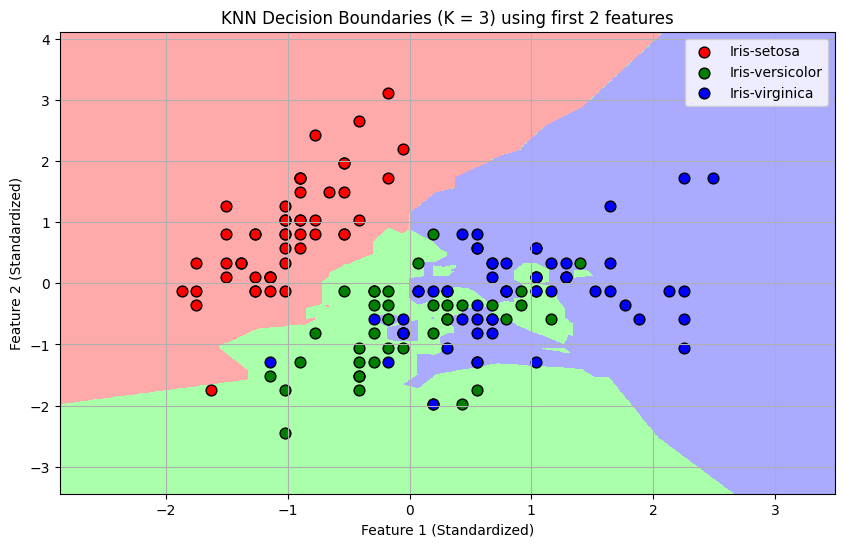

In [2]:
#  AI & ML Internship - Task 6: KNN Classification using Iris Dataset

#  Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

#  Step 2: Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload your 'Iris.csv' file

#  Step 3: Read and clean the dataset
df = pd.read_csv('Iris.csv')
df.drop('Id', axis=1, inplace=True)

#  Step 4: Define features and target
X = df.drop('Species', axis=1)
y = df['Species']

#  Step 5: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Step 7: Try different values of K and evaluate
print("🔎 Accuracy for different values of K:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy: {acc:.2f}")

#  Step 8: Train with best K (e.g., K=3)
k_best = 3
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#  Step 9: Evaluation
print("\n✅ Final Evaluation with K =", k_best)
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

#  Step 10: Decision Boundary (2D plot using 2 features)
# We use only 2 features (first two columns) and encode labels as numbers
X_vis = X_scaled[:, :2]
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts Species to 0,1,2

# Split for visualization model
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_encoded, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=k_best)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Step 11: Plot decision boundary
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Scatter original points
for idx, class_val in enumerate(np.unique(y_encoded)):
    plt.scatter(X_vis[y_encoded == class_val][:, 0], X_vis[y_encoded == class_val][:, 1],
                c=cmap_bold[idx], label=le.inverse_transform([class_val])[0], edgecolor='k', s=60)

plt.title(f"KNN Decision Boundaries (K = {k_best}) using first 2 features")
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()
